## IN3050/IN4050 Mandatory Assignment 2, 2025: Supervised Learning

- **Name:** Thomas Heim
- **Username:** thomheim 

### Rules

Before you begin the exercise, review the rules at this website: https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html , in particular the paragraph on cooperation. This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers with others. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html 
We do not entirely prohibit the use of generative language models ("smart assistants" like ChatGPT, Llama, Claude or Copilot), but you must clearly acknowledge this at all times, following the UiO guidelines: https://www.uio.no/english/studies/resources/ai_student.html
Note also that you must fully understand _all_ the parts of you submissions, even if you got some help from a generative model. This will be tested during your peer review sessions (https://www.uio.no/studier/emner/matnat/ifi/IN3050/v25/Peer%20review/).
By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, March 28, 2025, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a regular Python script if you prefer.

#### Alternative 1
If you prefer not to use notebooks, you should deliver the code, your run results, and a PDF report where you answer all the questions and explain your work.

#### Alternative 2
If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a PDF of your solution which shows the results of the runs. (If you can't export: notebook -> latex -> pdf on your own machine, you may do this on the IFI linux machines.)

Here is a list of *absolutely necessary* (but not sufficient) conditions to get the assignment marked as passed:

- You must deliver your code (Python script or Jupyter notebook) you used to solve the assignment.
- The code used for making the output and plots must be included in the assignment. 
- You must include example runs that clearly shows how to run all implemented functions and methods.
- All the code (in notebook cells or python main-blocks) must be runnable. If you have unfinished code that crashes, please comment it out and document what you think causes it to crash. 
- You must also deliver a PDF of the code, outputs, comments and plots as explained above.

Your report/notebook should contain your name and username.

Deliver one single compressed folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

### Goals of the assignment
The goal of this assignment is to get a better understanding of supervised learning with gradient descent. It will, in particular, consider the similarities and differences between linear classifiers and multi-layer feed forward neural networks (multi-layer perceptrons, MLP) and the differences and similarities between binary and multi-class classification. 

### Tools
The aim of the exercises is to give you a look inside the learning algorithms. You may freely use code from the weekly exercises and the published solutions. You should not use machine learning libraries like Scikit-Learn or PyTorch, because the point of this assignment is for you to implement things from scratch. You, however, are encouraged to use tools like NumPy, Pandas and MatPlotLib, which are not ML-specific.

The given precode uses NumPy. You are recommended to use NumPy since it results in more compact code, but feel free to use pure Python if you prefer. 

If anything is unclear, do not hesitate to ask. Also, if you think some assumptions are missing, make your own and explain them!

### Initialization

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn # This is only to generate a dataset

## Datasets

We start by making a synthetic dataset of 5000 instances and ten classes, with 500 instances in each class. (See https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html regarding how the data are generated.) We choose to use a synthetic dataset---and not a set of natural occuring data---because we are mostly interested in properties of the various learning algorithms, in particular the differences between linear classifiers and multi-layer neural networks together with the difference between binary and multi-class data. In addition, we would like a dataset with instances represented with only two numerical features, so that it is easy to visualize the data. It would be rather difficult (although not impossible) to find a real-world dataset of the same nature. Anyway, you surely can use the code in this assignment for training machine learning models on real-world datasets.

When we are doing experiments in supervised learning, and the data are not already split into training and test sets, we should start by splitting the data. Sometimes there are natural ways to split the data, say training, on data from one year and testing on data from a later year, but if that is not the case, we should shuffle the data randomly before splitting. (OK, that is not necessary with this particular synthetic data set, since it is already shuffled by default by Scikit-Learn, but that will not be the case with real-world data) We should split the data so that we keep the alignment between X (features) and t (class labels), which may be achieved by shuffling the indices. We split into 60% for training, 20% for validation, and 20% for final testing. The set for final testing *must not be used* till the end of the assignment in part 3.

We fix the seed both for data set generation and for shuffling, so that we work on the same datasets when we rerun the experiments. This is done by the `random_state` argument and the `rng = np.random.RandomState(424242)`.

In [93]:
# Generating the dataset
from sklearn.datasets import make_blobs
X, t_multi = make_blobs(n_samples=[500, 500, 500, 500, 500, 500, 500, 500, 500, 500], centers=[[0,1],[4,2],[8,1],[2,0],[6,0],[3,-3],[4,-2],[0,5],[0,4],[-2,-2]], 
                  n_features=2, random_state=424242, cluster_std=[1.0, 2.0, 1.0, 0.5, 0.5, 3.0, 1.0, 0.5, 2.5, 2.5])

In [94]:
# Shuffling the dataset
indices = np.arange(X.shape[0])
rng = np.random.RandomState(424242)
rng.shuffle(indices)
indices[:10]

array([3560, 4674,   49, 1257,  661, 3066, 3834, 4792,  570, 3855])

In [95]:
# Splitting into train, dev and test
X_train = X[indices[:3000],:]
X_val = X[indices[3000:4000],:]
X_test = X[indices[4000:],:]
t_multi_train = t_multi[indices[:3000]]
t_multi_val = t_multi[indices[3000:4000]]
t_multi_test = t_multi[indices[4000:]]

Next, we will  make a second dataset with only two classes by merging the existing labels in (X,t), so that `0-5` become the new `0` and `6-9` become the new `1`. Let's call the new set (X, t2). This will be a binary set.
We now have two datasets:

- Binary set: `(X, t2)`
- Multi-class set: `(X, t_multi)`

In [96]:
t2_train = t_multi_train >= 6
t2_train = t2_train.astype("int")
t2_val = (t_multi_val >= 6).astype("int")
t2_test = (t_multi_test >= 6).astype("int")

We can plot the two traning sets.

Text(0.5, 1.0, 'Multi-class set')

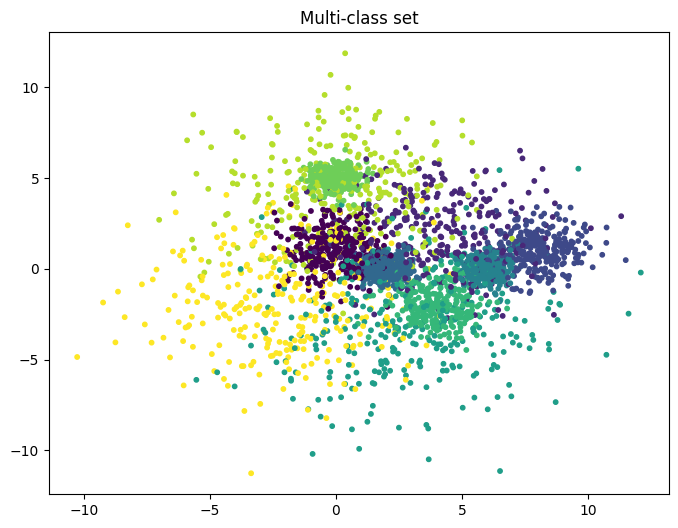

In [97]:
plt.figure(figsize=(8,6)) # You may adjust the size
plt.scatter(X_train[:, 0], X_train[:, 1], c=t_multi_train, s=10.0)
plt.title("Multi-class set")

Text(0.5, 1.0, 'Binary set')

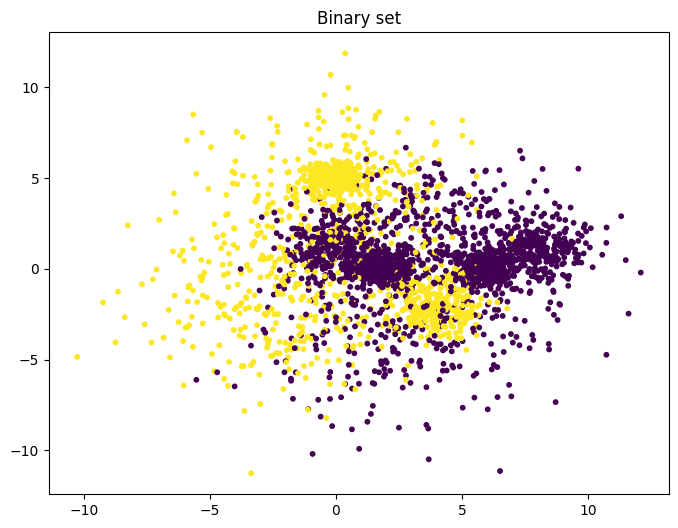

In [98]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=t2_train, s=10.0)
plt.title("Binary set")

# Part 1: Linear classifiers
### Linear regression

We see that even the binary set (X, t2) is far from linearly separable, and we will explore how various classifiers are able to handle this. We start with linear regression with the Mean Squared Error (MSE) loss, although it is not the most widely used approach for classification tasks: but we are interested. You may make your own implementation from scratch or start with the solution to the weekly exercise set 6. We include it here with a little added flexibility.

In [99]:
def add_bias(X, bias):
    """X is a NxM matrix: N datapoints, M features
    bias is a bias term, -1 or 1, or any other scalar. Use 0 for no bias
    Return a Nx(M+1) matrix with added bias in position zero
    """
    N = X.shape[0]
    biases = np.ones((N, 1)) * bias # Make a N*1 matrix of biases
    # Concatenate the column of biases in front of the columns of X.
    return np.concatenate((biases, X), axis  = 1) 

In [100]:
class NumpyClassifier():
    """Common methods to all Numpy classifiers --- if any"""

In [101]:
class NumpyLinRegClass(NumpyClassifier):

    def __init__(self, bias=-1):
        self.bias=bias
    
    def fit(self, X_train, t_train, lr = 0.1, epochs=10):
        """X_train is a NxM matrix, N data points, M features
        t_train is avector of length N,
        the target class values for the training data
        lr is our learning rate
        """
        
        if self.bias:
            X_train = add_bias(X_train, self.bias)
            
        (N, M) = X_train.shape
        
        self.weights = weights = np.zeros(M)
        
        for epoch in range(epochs):
            # print("Epoch", epoch)
            weights -= lr / N *  X_train.T @ (X_train @ weights - t_train)      
    
    def predict(self, X, threshold=0.5):
        """X is a KxM matrix for some K>=1
        predict the value for each point in X"""
        if self.bias:
            X = add_bias(X, self.bias)
        ys = X @ self.weights
        return ys > threshold

We can train and test a first classifier (on the binary dataset).

In [102]:
def accuracy(predicted, gold):
    return np.mean(predicted == gold)

In [103]:
cl = NumpyLinRegClass()
cl.fit(X_train, t2_train, epochs=10)
accuracy(cl.predict(X_val), t2_val)

0.638

The following is a small procedure which plots the data set together with the decision boundaries. 
You may modify the colors and the rest of the graphics as you like.
The procedure will also work for multi-class classifiers

In [104]:
def plot_decision_regions(X, t, clf=[], size=(8,6)):
    """Plot the data set (X,t) together with the decision boundary of the classifier clf"""
    # The region of the plane to consider determined by X
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Make a prediction of the whole region
    h = 0.02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Classify each meshpoint.
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=size) # You may adjust this

    # Put the result into a color plot
    plt.contourf(xx, yy, Z, alpha=0.2, cmap = 'tab10')

    plt.scatter(X[:,0], X[:,1], c=t, s=10.0, cmap='tab10')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision regions")
    plt.xlabel("x0")
    plt.ylabel("x1")

#    plt.show()

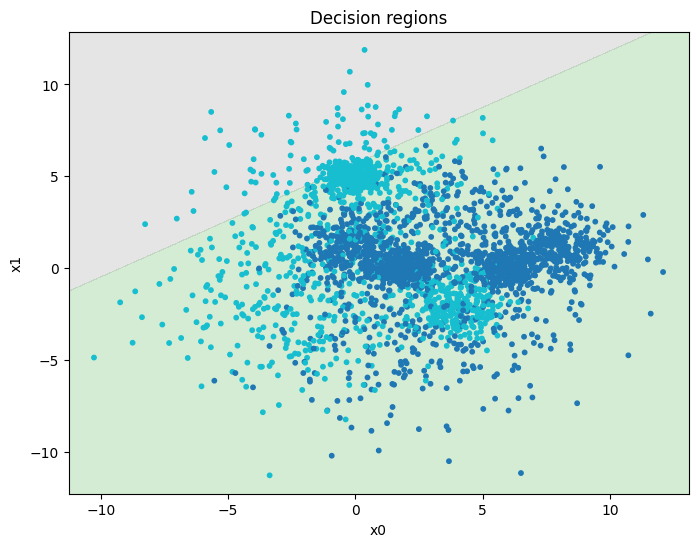

In [105]:
plot_decision_regions(X_train, t2_train, cl)

### Task: Tuning

The result is far from impressive. 
Remember that a classifier which always chooses the majority class will have an accuracy of 0.6 on this data set.

Your task is to try various settings for the two training hyper-parameters, learning rate and the number of epochs, to get the best accuracy on the validation set. 

Report how the accuracy varies with the hyper-parameter settings. It it not sufficient to give the final hyperparameters. You must also show how you found then and results for alternative values you tried aout.

When you are satisfied with the result, you may plot the decision boundaries, as above.

Exploring hyperparameters:
-------------------------
LR: 0.001, Epochs: 10, Validation Accuracy: 0.5970
LR: 0.001, Epochs: 50, Validation Accuracy: 0.5970
LR: 0.001, Epochs: 100, Validation Accuracy: 0.5970
LR: 0.001, Epochs: 200, Validation Accuracy: 0.5970
LR: 0.001, Epochs: 500, Validation Accuracy: 0.6120
LR: 0.01, Epochs: 10, Validation Accuracy: 0.5970
LR: 0.01, Epochs: 50, Validation Accuracy: 0.6120
LR: 0.01, Epochs: 100, Validation Accuracy: 0.6340
LR: 0.01, Epochs: 200, Validation Accuracy: 0.7620
LR: 0.01, Epochs: 500, Validation Accuracy: 0.7620
LR: 0.1, Epochs: 10, Validation Accuracy: 0.6380
LR: 0.1, Epochs: 50, Validation Accuracy: 0.7610
LR: 0.1, Epochs: 100, Validation Accuracy: 0.7530
LR: 0.1, Epochs: 200, Validation Accuracy: 0.7550
LR: 0.1, Epochs: 500, Validation Accuracy: 0.7550
LR: 0.5, Epochs: 10, Validation Accuracy: 0.6730
LR: 0.5, Epochs: 50, Validation Accuracy: 0.6730
LR: 0.5, Epochs: 100, Validation Accuracy: 0.6730
LR: 0.5, Epochs: 200, Validation Accurac

/var/folders/kd/j0t_qpxn5232l1_zzhlcb2wc0000gn/T/ipykernel_76420/1812362137.py:22: RuntimeWarning: overflow encountered in matmul
  weights -= lr / N *  X_train.T @ (X_train @ weights - t_train)
/var/folders/kd/j0t_qpxn5232l1_zzhlcb2wc0000gn/T/ipykernel_76420/1812362137.py:22: RuntimeWarning: invalid value encountered in matmul
  weights -= lr / N *  X_train.T @ (X_train @ weights - t_train)


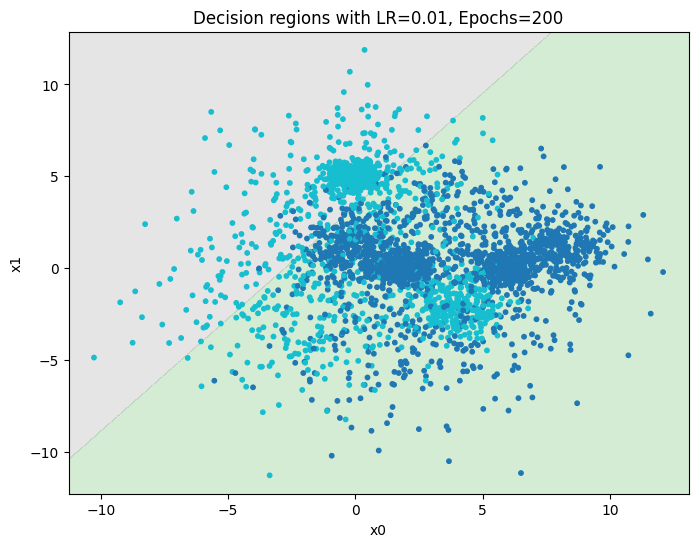

In [106]:
# I have used grid search to find the best hyper-parameters. 

# Define ranges of hyperparameters to try
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0] # Different learning rates
epochs_list = [10, 50, 100, 200, 500] # Different number of epochs

print("Exploring hyperparameters:")
print("-------------------------")

# Initialize variables to track the best performance found so format for accuracy,learning rate and epochs
best_accuracy = 0
best_lr = None
best_epochs = None

# Here we have nested loops to try every combination of learning rate and epochs
for lr in learning_rates:
    for num_epochs in epochs_list:
        # Making a new instance of the model
        model = NumpyLinRegClass()
        # Traning the model with the current combination of hyperparameters
        model.fit(X_train,t2_train,lr=lr,epochs=num_epochs)
        # Calcualte how accurate the model predicts on the validation set
        val_accuracy = accuracy(model.predict(X_val),t2_val)
        # Print the current hyperparameter and their resulting accuracy
        print(f"LR: {lr}, Epochs: {num_epochs}, Validation Accuracy: {val_accuracy:.4f}")

        # If this combination give better accuracy than previous combination,
        # update the traking varible to the current combination
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_lr = lr
            best_epochs = num_epochs

# Print a summary of the best hyperparameters found in the search
print("\nBest hyperparameters found:")
print(f"Learning Rate: {best_lr}")
print(f"Epochs: {best_epochs}")
print(f"Validation Accuracy: {best_accuracy:.4f}")

# Making a final model using the best hyperparameters we found
best_model = NumpyLinRegClass()
best_model.fit(X_train,t2_train,lr=best_lr,epochs=best_epochs)

# Showing the decison boundaries on the best model
plot_decision_regions(X_train,t2_train,best_model)
plt.title(f"Decision regions with LR={best_lr}, Epochs={best_epochs}")
plt.show()




**Comment on the results:** We see that the hyperparameters that gave the best results was: 
- Learning Rate: 0.01
- Epochs: 200
- Validation Accuracy: 0.7620

You can see the different parameter I tested in the print statements above the decision boundary plot.

End of solution

### Task: Scaling

We have seen in the lectures that scaling the data may improve training speed and sometimes the performance. 

- Implement the standard scaler (normalizer); you can also try other scaling techniques
- Scale the data
- Train the model on the scaled data
- Experiment with hyper-parameter settings and see whether you can speed  up or improve the training.
- Report final hyper-parameter settings and show how you found them.

In [107]:
# 1) Implementing a standard scaler
class StandardScaler:
    def __init__(self):
        self.mean = None
        self.std = None
    
    def fit(self,X):
        """Calculate the mean standard deviation for each feature"""
        self.mean = np.mean(X,axis=0) #Mean of each column in the traning data
        self.std = np.std(X,axis=0) # Standard deviation of each feature
        # Replacing any zero standard deviation with 1.0 to avoid division by zero 
        self.std[self.std == 0] = 1.0 

    def transform(self,X):
        """Transform the data by subtracting the mean and dividing by standard deviation"""
        return (X - self.mean) / self.std
    
    def fit_transform(self,X):
        """Fit to data, then transform it in one step"""
        # First learn the parameters form X, then transform X
        self.fit(X)
        return self.transform(X)
    
# 2) Scale the data
# Creating an instance of the StandardScaler
scaler = StandardScaler()
# Apply the scaler to training data. Fit and transform in one step.
X_train_scaled = scaler.fit_transform(X_train)
# Transform the validation data using same parameters learned form traning data
X_val_scaled = scaler.transform(X_val)
# Also transform the test data with the same parameters
X_test_scaled = scaler.transform(X_test)

# 3) Train the model on the scaled data
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0] # Different learning rates
epochs_list = [10, 50, 100, 200, 500] # Different number of epochs

print("Hyperparameter search with scaled data:")
print("------------------------------------")

# Import time module to mesure training time
import time

# Initialize variables to track the best performance found
best_accuracy= 0 # Best accuracy
best_lr = None # Learning rate that gave best accuracy
best_epochs = None # Number of ephocs that gave the best accuracy
results = [] # Store the result for later analysis

# Nested loops used for trying different combinations of learning rate and epochs
for lr in learning_rates:
    for num_epochs in epochs_list:
        # Create a new instance of the model
        model = NumpyLinRegClass()
        # Mesure traning time
        start_time = time.time()
        # Train the model on scaled data
        model.fit(X_train_scaled,t2_train, lr=lr, epochs=num_epochs)
        # Calculate traning time
        training_time = time.time() - start_time

  
        #Evaluate the model on the scaled validation set
        val_accuracy = accuracy(model.predict(X_val_scaled),t2_val)
        # Store the results of this hyperparameter combination
        results.append((lr, num_epochs,val_accuracy,training_time))
        # Print current hyperparameters and resulting validation accuracy
        print(f"LR: {lr}, Epochs: {num_epochs}, Accuracy: {val_accuracy:.4f}, Time: {training_time:.3f}s")

        # Update best parameters if this combination gives better accuracy
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_lr = lr
            best_epochs = num_epochs
            best_time = training_time 

# 4) Report final hyper-parameter settings
# Sort all result by accuracy in descending order
results.sort(key=lambda x: x[2], reverse=True)

# Display the top 5 best performing hyperparameter combinations
print("\nTop 5 hyperparameter combinations with scaled data:")
for i, (lr, epochs, acc, train_time) in enumerate(results[:5]):
    print(f"{i+1}. LR: {lr}, Epochs: {epochs}, Accuracy: {acc:.4f}, Time: {train_time:.3f}s")


# Get performance on unscaled data for comparison
unscaled_model = NumpyLinRegClass()
start_time = time.time()
unscaled_model.fit(X_train, t2_train, lr=best_lr, epochs=best_epochs)
unscaled_time = time.time() - start_time
unscaled_accuracy = accuracy(unscaled_model.predict(X_val), t2_val)

# Display the best hyperparameters and improvements from scaling 
print(f"best_accuracy: {best_accuracy}")
print(f"best_time: {best_time}")

print(f"best_lr: {best_lr}")
print(f"best_epochs: {best_epochs}")

Hyperparameter search with scaled data:
------------------------------------
LR: 0.001, Epochs: 10, Accuracy: 0.5970, Time: 0.003s
LR: 0.001, Epochs: 50, Accuracy: 0.5970, Time: 0.002s
LR: 0.001, Epochs: 100, Accuracy: 0.5970, Time: 0.009s
LR: 0.001, Epochs: 200, Accuracy: 0.5970, Time: 0.011s
LR: 0.001, Epochs: 500, Accuracy: 0.5970, Time: 0.023s
LR: 0.01, Epochs: 10, Accuracy: 0.5970, Time: 0.000s
LR: 0.01, Epochs: 50, Accuracy: 0.5970, Time: 0.003s
LR: 0.01, Epochs: 100, Accuracy: 0.6330, Time: 0.005s
LR: 0.01, Epochs: 200, Accuracy: 0.7660, Time: 0.009s
LR: 0.01, Epochs: 500, Accuracy: 0.7510, Time: 0.024s
LR: 0.1, Epochs: 10, Accuracy: 0.6400, Time: 0.001s
LR: 0.1, Epochs: 50, Accuracy: 0.7520, Time: 0.002s
LR: 0.1, Epochs: 100, Accuracy: 0.7550, Time: 0.005s
LR: 0.1, Epochs: 200, Accuracy: 0.7550, Time: 0.009s
LR: 0.1, Epochs: 500, Accuracy: 0.7550, Time: 0.022s
LR: 0.5, Epochs: 10, Accuracy: 0.7530, Time: 0.000s
LR: 0.5, Epochs: 50, Accuracy: 0.7550, Time: 0.002s
LR: 0.5, Epochs

In [108]:
# Display the improvement metrics
print(f"Accuracy improvement: {((best_accuracy - unscaled_accuracy) / unscaled_accuracy) * 100:.2f}%")
print(f"Training speedup: {(unscaled_time / best_time):.2f}x")

Accuracy improvement: 0.52%
Training speedup: 0.99x


**Comment on the results:** The best hyperparameters was learning rate of 0.01 and best epochs of 200, that gave best accuracy of 0.766. 

As we could see form the print output obove the scaling helped 0.52% on accuracy and on the traning speed it helped a lot compared to the non-scaled version. The traning speedup changes form run to run. 

End of solution

## Logistic regression
a) You should now implement a logistic regression classifier similarly to the classifier based on linear regression.
You may use the code from the solution to weekly exercise set week06.

b) In addition to the method `predict()` which predicts a class for the data, include a method `predict_probabilities()` which predicts the probability of the data belonging to the positive class.

c) So far, we have not calculated the loss explicitly in the code. Extend the code to calculate the loss on the training set for each epoch and to store the losses such that the losses can be inspected after training. The prefered loss for logistic regression is binary cross-entropy, but you can also try mean squared error. The most important is that your implementation of the loss corresponds to your implementation of the gradient descent.
Also, calculate and store accuracies after each epoch.

d) In addition, extend the `fit()` method with optional arguments for a validation set (X_val, t_val). If a validation set is included in the call to `fit()`, calculate the loss and the accuracy for the validation set after each epoch. 

e) The training runs for a number of epochs. We cannot know beforehand for how many epochs it is reasonable to run the training. One possibility is to run the training until the learning does not improve much. Extend the `fit()` method with two keyword arguments, `tol` (tolerance) and `n_epochs_no_update` and stop training when the loss has not improved with more than `tol` after `n_epochs_no_update` (to save compute and potentially avoid over-fitting). A possible default value for `n_epochs_no_update` is 2. Also, add an attribute to the classifier which tells us after fitting how many epochs it was trained for.

f) Train classifiers with various learning rates, and with varying values for `tol` for finding the optimal values. Also consider the effect of scaling the data.

g) After a succesful training, for your best model, plot both training loss and validation loss as functions of the number of epochs in one figure, and both training and validation accuracies as functions of the number of epochs in another figure. Comment on what you see. Are the curves monotone? Is this as expected?

In [109]:
# I have used the the solution code to weekly exercise set 6 as starter code.
def logistic(x):
    # Sigmoid function that converts any input to a vlauve between 0 and 1. 
    return 1/ (1 +np.exp(-x)) 

Testing hyperparameters:
----------------------

Best overall model:
Type: Scaled
Learning Rate: 1.438449888287663
Tolerance: 1e-06
Validation Accuracy: 0.7750

Scaling effect:
Accuracy difference: 0.20%
Scaled model is better🧙


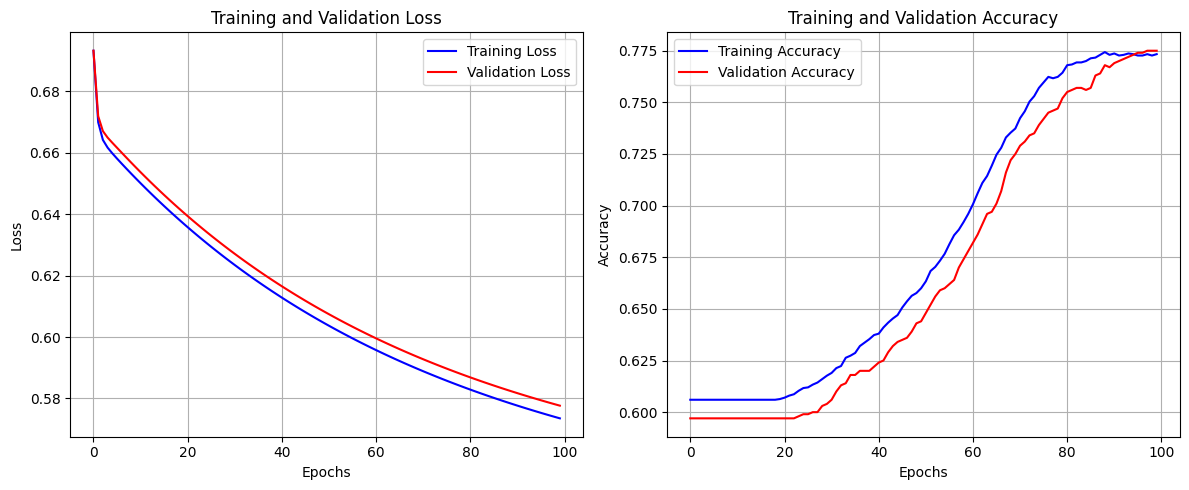

In [110]:
# I have used the the solution code to weekly exercise set 6 as starter code.
class NumpyLogReg():
    def fit(self, X_train, t_train, eta=0.1, epochs=10, X_val=None, t_val=None, tol=1e-4, n_epochs_no_update=2):
        """X_train is a Nxm matrix, N data points, m features
        t_train is a vector of length N,
        the targets value for the training data"""
        # Get the number of samples (N) and features (m) from the training data shape.
        (N, m) = X_train.shape
        X_train_bias = add_bias(X_train, 1)  # Add a bias term to the training data
        # Initialization of weights
        self.weights = np.zeros(m + 1) 

        self.losses = []  # List to store loss values for each epoch
        self.accuracies = []  # List to store accuracy values for each epoch
        self.val_losses = []  # List to store validation loss values for each epoch
        self.val_accuracies = []  # List to store validation accuracy values for each epoch

        # Early stopping variables
        best_loss = float('inf')
        epochs_no_improvement = 0

        for e in range(epochs):
            # Forward pass
            predictions = self.forward(X_train_bias)  
            # Calculate and store loss
            loss = self.binary_cross_entropy(t_train, predictions)
            self.losses.append(loss)
            # Calculate and store accuracy
            accuracy = np.mean((predictions > 0.5).astype(int) == t_train)
            self.accuracies.append(accuracy)

            # Validation calculations
            if X_val is not None and t_val is not None: # Check if validation data and lables are provided
                X_val_bias = add_bias(X_val, 1) # Add a bias term to the validation data
                val_predictions = self.forward(X_val_bias) #  Get predictions for the validation data using the forward method
                val_loss = self.binary_cross_entropy(t_val, val_predictions) # Calculate the loss for the validation data
                self.val_losses.append(val_loss) # Store the calculated validation loss in the list
                # Calculate validation accuracy by comparing predictions to true lables.
                val_accuracy = np.mean((val_predictions > 0.5).astype(int) == t_val) 
                self.val_accuracies.append(val_accuracy) # Store the calculated validation accuracy in the list

            # Update weights using gradient descent
            self.weights -= eta / N * X_train_bias.T @ (predictions - t_train) 
            
            # Early stopping check
            if loss < best_loss - tol:#Check if current loss is lower than the best loss minus the tolerance
                best_loss = loss # Update the best loss
                epochs_no_improvement = 0 # Reset the counter with no improvement
            else:
                epochs_no_improvement += 1 # Increment the counter with no improvement
            # Check if the number of epochs without improvment exceeds the threshold    
            if epochs_no_improvement >= n_epochs_no_update:
                break # Exit traning loop if no imporvement 
        # Store the total number of epochs the model was trained for.        
        self.epochs_trained = e + 1

    def forward(self, X):
        """Calculate the logistic function output for the input matrix X"""
        return logistic(X @ self.weights)
    
    def predict(self, x, threshold=0.5):
        """X is a Kxm matrix for some K>1
        predict the value for each point in X"""
        z = add_bias(x, 1)  # Add a bias term to the input data for prediction
        return (self.forward(z) > threshold).astype("int") # Compute predictions: Convert to binary values
    
    def predict_probabilities(self, x):
        """X is a Kxm matrix for some K>1
        predict the probabilities of each point in X belonging to the positive class"""
        z = add_bias(x, 1)  # Add a bias term to the input data for prediction
        return self.forward(z)  # Return the predicted probabilities from the forward method
    
    def binary_cross_entropy(self, y_true, y_pred):
        """Calculate the cross-entropy loss"""
        # Ensure y_pred doesn't contain zeros or ones (which would cause log(0))
        y_pred = np.clip(y_pred, 1e-15, 1-1e-15)
        # Calculate the binary cross-entropy loss
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


def min_max_scaling(X_train, X_val=None):
    """Simple min-max scaling to [0,1] range"""
    # Find min and max for each feature
    X_min = np.min(X_train, axis=0)
    X_max = np.max(X_train, axis=0)
     
    denom = X_max - X_min #Calculate the range for each feature in the traing data.
    denom[denom < 1e-10] = 1.0 #Ensure we don't divide by zero 
    
    # Scale to [0,1] range
    X_train_scaled = (X_train - X_min) / denom
    #If validation data is provided, scale it using the same min and max form traning data. 
    if X_val is not None:
        X_val_scaled = (X_val - X_min) / denom # Scalce validation data
        return X_train_scaled, X_val_scaled # Return both scaled traning and validation data
    return X_train_scaled # Return only scaled traning data if no validation data is provided

def find_best_hyperparameters():
    """Train model on different hyperparameters and find the best performing ones"""
    learning_rates = np.logspace(-3,1,20) # Different learning rates 
    tolerance_values = np.logspace(-6,-2,20) # Different tolerance values to test

    results_unscaled = [] # Store results for unscaled data
    results_scaled = []# Store results for scaled data

    # Scale the data for the scaled version
    X_train_scaled, X_val_scaled = min_max_scaling(X_train, X_val) 
    

    print("Testing hyperparameters:") 
    print("----------------------")
 
    for lr in learning_rates: # Loop through each learning rate
        for tol in tolerance_values: # Loop through each tolerance value
            model_unscaled = NumpyLogReg() # Create new instance of the model.
            # Train the model with unscaeld data. 
            model_unscaled.fit(X_train, t2_train, eta=lr, epochs=100,X_val=X_val, t_val=t2_val,tol=tol)
    
            # Get validation accuracy for unscaled model
            val_accuracy_unscaled = model_unscaled.val_accuracies[-1] # Get final validtion accuracy
            results_unscaled.append((lr,tol,val_accuracy_unscaled,model_unscaled)) # Store the results
            
            # Train model on scaled data(same hyperparameters)
            model_scaled = NumpyLogReg() # Create new instance of the model.
            model_scaled.fit(X_train_scaled, t2_train, eta=lr, epochs=100, 
                            X_val=X_val_scaled, t_val=t2_val, tol=tol)

            # Get validation accuracy for scaled model
            val_accuracy_scaled = model_scaled.val_accuracies[-1] # Get final validation accuracy
            results_scaled.append((lr,tol,val_accuracy_scaled,model_scaled)) # Store the results
            
    # Find best unscaled model
    best_unscaled = max(results_unscaled, key=lambda x: x[2]) # Find the best unscaled model
    best_lr_unscaled, best_tol_unscaled, best_acc_unscaled, best_model_unscaled = best_unscaled  # Unpack values

    #Find best scaled model
    best_scaled = max(results_scaled,key=lambda x: x[2]) #Find the best scaled model
    best_lr_scaled, best_tol_scaled, best_acc_scaled, best_model_scaled = best_scaled  # Unpack values

    # Print the overall best model hyperparameters
    print("\nBest overall model:")
    if best_acc_scaled >= best_acc_unscaled:
        print(f"Type: Scaled")
        print(f"Learning Rate: {best_lr_scaled}")
        print(f"Tolerance: {best_tol_scaled}")
        print(f"Validation Accuracy: {best_acc_scaled:.4f}")
        best_model = best_model_scaled
    else:
        print(f"Type: Unscaled")
        print(f"Learning Rate: {best_lr_unscaled}")
        print(f"Tolerance: {best_tol_unscaled}")
        print(f"Validation Accuracy: {best_acc_unscaled:.4f}")
        best_model = best_model_unscaled
    
    # Compare the two approaches
    print("\nScaling effect:")  
    print(f"Accuracy difference: {(best_acc_scaled - best_acc_unscaled) * 100:.2f}%")  # Accuracy difference

    # Return overal the best model
    if best_acc_scaled >= best_acc_unscaled: # Check if scaled model is better
        print("Scaled model is better🧙")
        return best_model_scaled # Return the best scaled model
    else:
        print("Unscaled model is better🧙🏽‍♀️")
        return best_model_unscaled # Return the best unscaled model
    
# Find the best model
best_model = find_best_hyperparameters()


plt.figure(figsize=(12, 5))  # Create figure with 2 subplots

# First subplot for losses
plt.subplot(1, 2, 1)  # Create first subplot (losses)
plt.plot(range(len(best_model.losses)), best_model.losses, 'b-', label='Training Loss')  # Plot training loss
plt.plot(range(len(best_model.val_losses)), best_model.val_losses, 'r-', label='Validation Loss')  # Plot validation loss
plt.title('Training and Validation Loss')  # Set title
plt.xlabel('Epochs')  # Set x-axis label
plt.ylabel('Loss')  # Set y-axis label
plt.legend()  # Add legend
plt.grid(True)  # Add grid

# Second subplot for accuracies
plt.subplot(1, 2, 2)  # Create second subplot (accuracies)
plt.plot(range(len(best_model.accuracies)), best_model.accuracies, 'b-', label='Training Accuracy')  # Plot training accuracy
plt.plot(range(len(best_model.val_accuracies)), best_model.val_accuracies, 'r-', label='Validation Accuracy')  # Plot validation accuracy
plt.title('Training and Validation Accuracy')  # Set title
plt.xlabel('Epochs')  # Set x-axis label
plt.ylabel('Accuracy')  # Set y-axis label
plt.legend()  # Add legend
plt.grid(True)  # Add grid

plt.tight_layout()  # Adjust layout
plt.show()  # Display the plots

##### Answer to f)
I have scaled the data in my code to look at the effect. From the output from my code above, we can see that the scaled model has 0.20% better accuracy than the unscaled model. This suggests that scaling the data makes the model better at converging efficiently, allowing it to find more optimal parameters. We see that scaling only improves the accuracy very slightly, and that might be because of the dataset we are synthesizing at the beginning of the notebook.

End of solution. 

##### Answer to g)
The loss curves decrease monotonically, with traning loss consistently lower than validation loss, indicating stable optimization. The accuracy curves howerver are not strictly monotonic, showing small flucatuations while maintaining and overall increasing trend.This can be expected as smal flucuations might accour due to the stochastic nature of gradient descent. 

Interestingly, the validation accuracy appears to cross the training accuracy near the end of the traning. This crossover can sugget that the validation set contains sligthly easier examples to classify, or it could indiacte theat the model is appropriately generalizing without overfitting the traning data. This could accour eg when we have implementet regularization as I have done in my code. 

End of solution. 

## Multi-class classifiers
We turn to the task of classifying when there are more than two classes, and the task is to ascribe one class to each input. We will now use the set `(X, t_multi)`.

### Multi-class with logistic regression
We saw in the lectures how a logistic regression classifier can be turned into a multi-class classifier using the one-vs-rest approach. We train one logistic regression classifier for each class. To predict the class of an item, we run all the binary classifiers and collect the probability score from each of them. We assign the class which ascribes the highest probability.

Build such a classifier. Train the resulting classifier on `(X_train, t_multi_train)`, test it on `(X_val, t_multi_val)`, tune the hyper-parameters and report the accuracy.

Also plot the decision boundaries for your best classifier similarly to the plots for the binary case.

### For IN4050 students: Multinomial logistic regression
The following part is only mandatory for IN4050 students. IN3050 students are also welcome to make it a try. Everybody has to do the part 2 on multi-layer neural networks. 

In the lectures, we contrasted the one-vs-rest approach with the multinomial logistic regression, also called softmax classifier. Implement also this classifier, tune the parameters, and compare the results to the classifiers above. (Don't expect a large difference on a simple task like this.)

Remember that this classifier uses softmax in the forward phase. For loss, it uses categorical cross-entropy loss. The loss has a somewhat simpler form than in the binary case. To calculate the gradient is a little more complicated. The actual gradient and update rule is simple, however, as long as you have calculated the forward values correctly.

Our classifier is not ideal. But is it because all the 10 classes are equally diffucult to predict?
You should evaluate the multinomial model predictions for each class separately and report your findings.
Please also report whether there is any difference in this respect between the training and the validation sets.

Training multi-class logistic regression (one-vs-rest approach)...
Running efficient grid search...
Training baseline model: LR=2.0, Epochs=1000, Tol=1e-06
Baseline accuracy: 0.6520
Testing: LR=0.5, Epochs=500, Tol=1e-07
Testing: LR=0.5, Epochs=500, Tol=1e-06
Testing: LR=0.5, Epochs=500, Tol=1e-05
Testing: LR=0.5, Epochs=500, Tol=0.0001
Testing: LR=0.5, Epochs=800, Tol=1e-07
Testing: LR=0.5, Epochs=800, Tol=1e-06
Testing: LR=0.5, Epochs=800, Tol=1e-05
Testing: LR=0.5, Epochs=800, Tol=0.0001
Testing: LR=0.5, Epochs=1000, Tol=1e-07
Testing: LR=0.5, Epochs=1000, Tol=1e-06
Testing: LR=0.5, Epochs=1000, Tol=1e-05
Testing: LR=0.5, Epochs=1000, Tol=0.0001
Testing: LR=0.5, Epochs=1200, Tol=1e-07
Testing: LR=0.5, Epochs=1200, Tol=1e-06
Testing: LR=0.5, Epochs=1200, Tol=1e-05
Testing: LR=0.5, Epochs=1200, Tol=0.0001
Testing: LR=0.5, Epochs=1500, Tol=1e-07
Testing: LR=0.5, Epochs=1500, Tol=1e-06
Testing: LR=0.5, Epochs=1500, Tol=1e-05
Testing: LR=0.5, Epochs=1500, Tol=0.0001
Testing: LR=1.0, Epoc

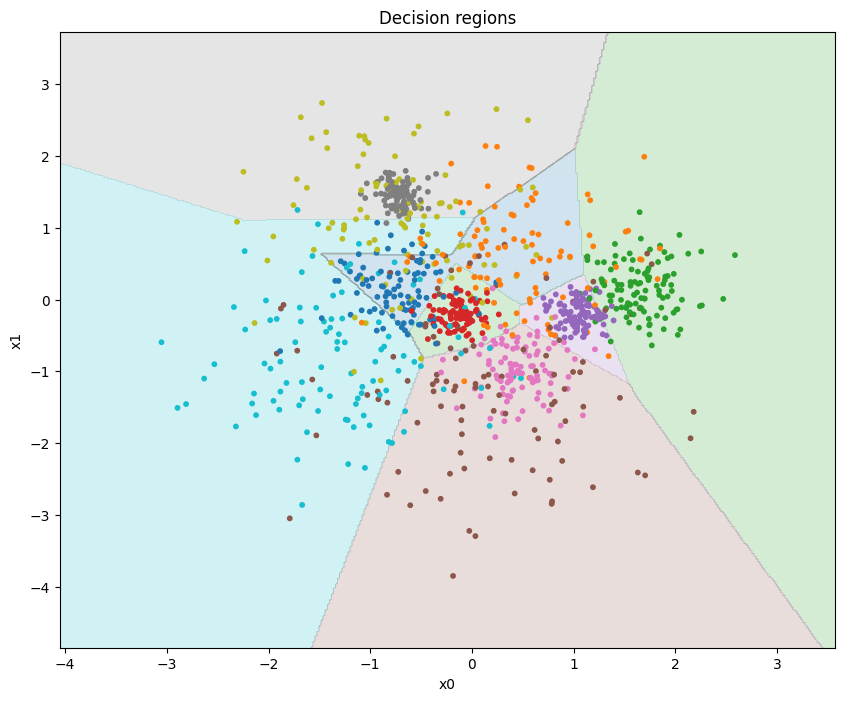

In [111]:
# A multi-class logistic regression classifier using the one-vs-rest approach
class MultiClassLogReg:
    def __init__(self):
        self.classifiers = []  # Initialize empty list to store one binary classifier for each class
        self.num_classes = 0   # Initialize count of distinct classes to zero
    
    def fit(self, X_train, t_train, eta=0.1, epochs=100, X_val=None, t_val=None, tol=1e-4, n_epochs_no_update=2):
        """Train one binary classifier for each class using one-vs-rest approach"""
        self.num_classes = len(np.unique(t_train))  # Count how many unique classes exist in the training data
        self.classifiers = []  # Reset classifiers list in case of retraining
        
        for class_idx in range(self.num_classes):  # Loop through each class (0 to num_classes-1)
            # Convert to binary problem: 1 for current class, 0 for all others
            binary_targets = (t_train == class_idx).astype(int) 
            classifier = NumpyLogReg()  # Create a new binary logistic regression classifier
            
            # Handle validation data if provided
            binary_val_targets = None # Default to None if no validation data. 
            if X_val is not None and t_val is not None: #Check if validation data exists
                binary_val_targets = (t_val == class_idx).astype(int) #Create binary validation targeted_search
                
            # Train the classifier with appropriate parameters
            classifier.fit(X_train, binary_targets, eta=eta, epochs=epochs, 
                          X_val=X_val, t_val=binary_val_targets, tol=tol, 
                          n_epochs_no_update=n_epochs_no_update)
            
            self.classifiers.append(classifier)  # Store the trained classifier in our list
    
    def predict_probabilities(self, X):
        # Create matrix to hold probabilities for each class
        probabilities = np.zeros((X.shape[0], self.num_classes)) # Initialize probability matrix: samples x classes
        for class_idx in range(self.num_classes):
            # Get probability for each sample belonging to current class
            probabilities[:, class_idx] = self.classifiers[class_idx].predict_probabilities(X)
        return probabilities
    
    def predict(self, X):
        probabilities = self.predict_probabilities(X)  # Get all class probabilities
        return np.argmax(probabilities, axis=1)  # Return class with highest probability for each sample
    
    def accuracy(self, X, t):
        # Calculate proportion of correct predictions
        return np.mean(self.predict(X) == t)

def standardize_data(X_train, X_val=None):
    """Standardize data to have zero mean and unit variance"""
    mean = np.mean(X_train, axis=0) # Calculate mean of each feature
    std = np.std(X_train, axis=0) # Calcualte standard deviation for each feature
    std[std < 1e-10] = 1.0  # Avoid division by zero
    
    X_train_std = (X_train - mean) / std # Standardize traning data
    
    if X_val is not None: # Check if validation data exists
        X_val_std = (X_val - mean) / std # Standardize validation data using traning stats
        return X_train_std, X_val_std # Return both scaled traning and validation data
    return X_train_std # Return only scaled traning data if no validation data is provided

def efficient_grid_search(X_train, t_train, X_val, t_val):
    """Efficient grid search starting from baseline"""
    print("Running efficient grid search...")
    
    # Baseline parameters that gave me okey results when I tested them
    baseline_lr = 2.0 # Learning rate
    baseline_epochs = 1000 # Number of epochs
    baseline_tol = 1e-6 # Tolerance
    # Standardize data
    X_train_std, X_val_std = standardize_data(X_train, X_val)
    
    # Train baseline model
    print(f"Training baseline model: LR={baseline_lr}, Epochs={baseline_epochs}, Tol={baseline_tol}")
    baseline_model = MultiClassLogReg()
    baseline_model.fit(X_train_std, t_train, eta=baseline_lr, epochs=baseline_epochs,
                      X_val=X_val_std, t_val=t_val, tol=baseline_tol, n_epochs_no_update=5)
    # Evaluate baseline model
    baseline_accuracy = baseline_model.accuracy(X_val_std, t_val)
    print(f"Baseline accuracy: {baseline_accuracy:.4f}")
    
    best_model = baseline_model # Initialize best model tracking
    best_accuracy = baseline_accuracy # Initialize best accuracy tracking
    
    # Define hyperparameter ranges
    learning_rates = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 5.0] # Learning rates to test
    epochs_values = [500, 800, 1000, 1200, 1500] # Epochs to test
    tolerance_values = [1e-7, 1e-6, 1e-5, 1e-4] # Tolerance to test
    
    # Begin grid seach 
    for lr in learning_rates: # For each larning rate 
        for epochs in epochs_values: # For each number of epochs
            # Skip longer training if we alredy have okey performance
            if epochs > 1000 and best_accuracy > baseline_accuracy + 0.01:
                continue # Skip to next parameter set
                
            for tol in tolerance_values: # For each tolerance value
                # Skip baseline (already tested)
                if lr == baseline_lr and epochs == baseline_epochs and tol == baseline_tol:
                    continue # Skip to next tolerance value
                
                print(f"Testing: LR={lr}, Epochs={epochs}, Tol={tol}")
                
                model = MultiClassLogReg() # Create new model
                # Train moel with current parameters
                model.fit(X_train_std, t_train, eta=lr, epochs=epochs, 
                         X_val=X_val_std, t_val=t_val, tol=tol, n_epochs_no_update=5)
                
                accuracy = model.accuracy(X_val_std, t_val) # Evaluate model
                
                if accuracy > best_accuracy: # If current model is better
                    best_accuracy = accuracy # Update best accuracy
                    best_model = model # Update best model
                    print(f"New best: {accuracy:.4f} (LR={lr}, Epochs={epochs}, Tol={tol})")
    
    print(f"Search complete. Best validation accuracy: {best_accuracy:.4f}")  # Print final result
    return best_model, X_val_std  # Return best model and standardized validation data 

# Execute main task
print("Training multi-class logistic regression (one-vs-rest approach)...")  
best_model, X_val_plot = efficient_grid_search(X_train, t_multi_train, X_val, t_multi_val)  # Find best model

# Report final results
final_accuracy = best_model.accuracy(X_val_plot, t_multi_val)  # Calculate final accuracy
print(f"Final multi-class validation accuracy: {final_accuracy:.4f}")  # Print final accuracy

# Visualize results
print("Plotting decision boundaries...")  
plot_decision_regions(X_val_plot, t_multi_val, best_model, size=(10, 8))  # Create decision boundary plot

**Comment on the results:** I have used the Standard Scaler for this task since it gave me better accuracy compared to re-using the Min-Max scaling from NumpyLogReg(). I tried using the Standard Scaler for NumpyLogReg(), but this gave me worse accuracy. This is the reason I used two different scaling techniques and did not re-use the scaling code. We can see from this model that I achieved an accuracy of 0.6530, which is worse than NumpyLogReg(). I think the reason I got lower accuracy is that multi-class classification requires solving multiple binary problems simultaneously, where decision boundaries may conflict, especially in regions where multiple classes overlap. This lower accrucy would be expected. 

End of solution


# Part 2 Multi-layer neural networks

## A first non-linear classifier

The following code is a simple implementation of a multi-layer perceptron or feed-forward neural network.
For now, it is quite restricted.
There is only one hidden layer with 6 neurons.
It can only handle binary classification.
In addition, it uses a simple final layer similar to the linear regression classifier above.
One way to look at it is what happens when we add a hidden layer to the linear regression classifier.

The MLP class below misses the implementation of the `forward()` function. Your first task is to implement it. 

Remember that in the forward pass, we "feed" the input to the model, the model processes it and produces the output. The function should make use of the logistic activation function and bias.

In [112]:
# First, we define the logistic function and its derivative:
def logistic(x):
    return 1/(1+np.exp(-x))

def logistic_diff(y):
    return y * (1 - y)

In [113]:
class MLPBinaryLinRegClass(NumpyClassifier):
    """A multi-layer neural network with one hidden layer"""
    def __init__(self, bias=-1, dim_hidden = 6):
        """Intialize the hyperparameters"""
        self.bias = bias
        # Dimensionality of the hidden layer
        self.dim_hidden = dim_hidden
        self.activ = logistic
        self.activ_diff = logistic_diff

    def forward(self, X):
        """TODO(DONE):
        Perform one forward step.
        Return a pair consisting of the outputs of the hidden_layer
        and the outputs on the final layer"""
        # First layer: matrix multiplu X (with bias) by weights1
        heidden_actications = X @ self.weights1
        # Apply activation function 
        hidden_outputs_no_bias = self.activ(heidden_actications)  
        # Add bias to hidden layer outputs for second layer
        hidden_outs = add_bias(hidden_outputs_no_bias, self.bias)
        # Second layer: matrix multiply hidden outputs by weights2
        outputs = self.activ(hidden_outs @ self.weights2)
        return hidden_outs, outputs
    
    #b)
    # Binary cross-entropy loss function
    def binary_cross_entropy(self, y_true, y_pred):
        """Calculate binary cross-entropy loss"""
        # Clip prediction to avoid log(0) error 
        y_pred = np.clip(y_pred, 1e-15, 1-1e-15)
        # Calculating the coross-entropy loss
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    # Added validation set as optional arguments
    def fit(self, X_train, t_train, lr=0.001, epochs=100, X_val=None, t_val=None, tol=1e-4, n_epochs_no_update=2):
        """Initialize the weights. Train *epochs* many epochs. 
        X_train is a NxM matrix, N data points, M features
        t_train is a vector of length N of targets values for the training␣
        ↪data,
        where the values are 0 or 1.
        lr is the learning rate
        """
        self.lr = lr
        # Turn t_train into a column vector, a N*1 matrix:
        T_train = t_train.reshape(-1,1)
        dim_in = X_train.shape[1]
        dim_out = T_train.shape[1]

        # Initialize the weights
        self.weights1 = (np.random.rand(dim_in + 1, self.dim_hidden) * 2 - 1)/np.sqrt(dim_in)
        self.weights2 = (np.random.rand(self.dim_hidden+1,dim_out) * 2 - 1)/np.sqrt(self.dim_hidden)

        X_train_bias = add_bias(X_train, self.bias)

        #c)  Prepare validation data if provided
        if X_val is not None and t_val is not None: # Check if both validation features and targets are provided 
            T_val = t_val.reshape(-1,1) # Reshape validation targets into column vector (N samples x 1)
            X_val_bias = add_bias(X_val,self.bias) # Add bias to validation features
            self.val_losses = [] # Initialize list to store validation losses
            self.val_accuracies = [] # Initialize list to store validation accuracies

        # Initialize lists to store loss and accuracy
        self.losses = []
        self.accuracies = []

        # d) Varable for early stopping
        best_loss = float('inf') # Initialize best loss to infinity
        epochs_no_improvement = 0 # Counter for epochs without improvement

        for e in range(epochs):
        # One epoch
        # The forward step:
            hidden_outs, outputs = self.forward(X_train_bias)

            # b) Calculate and store loss for this epoch 
            loss = self.binary_cross_entropy(T_train, outputs)
            self.losses.append(loss)

            #b) Calculate and store accuracy for this epoch
            # Convert predicted outputs to binary class labels(1 if output > 0.5, else 0)
            predictions = (outputs > 0.5).astype(int)
            # Calculate accuracy 
            accuracy = np.mean(predictions == T_train)
            self.accuracies.append(accuracy) # Store accuracy

            #c) If validation data is provided,calculate validation loss and accuracy 
            if X_val is not None and t_val is not None:
                # Forward pass on validation data
                val_hidden_outs, val_outputs = self.forward(X_val_bias)
                #Calculate and store validation loss
                val_loss = self.binary_cross_entropy(T_val, val_outputs)
                self.val_losses.append(val_loss)
                # Calculate validation accuracy 
                val_predictions = (val_outputs > 0.5).astype(int) # Convert predicted outputs to binary class labels
                val_accuracy = np.mean(val_predictions == T_val) # Calculate accuracy
                self.val_accuracies.append(val_accuracy) # Store accuracy

                # d) Use validation loss for early stopping if available
                current_loss = val_loss # Use validation loss for early stopping
            else:
                current_loss = loss # Use traning loss if no validation data

            #d) Early stopping check
            if current_loss < best_loss: # Check if loss improved 
                best_loss = current_loss # Update best loss
                epochs_no_improvement = 0 # Reset counter
            else:
                epochs_no_improvement += 1 # Increment counter if not improved

            #d) Stop traning if no improvement for n epochs
            if epochs_no_improvement >= n_epochs_no_update: # Check if no improvement for n epochs
                break # Stop traning early

            # The delta term on the output node:
            out_deltas = (outputs - T_train)
            # The delta terms at the output of the hidden layer:
            hiddenout_diffs = out_deltas @ self.weights2.T
            # The deltas at the input to the hidden layer:
            hiddenact_deltas = (hiddenout_diffs[:, 1:] *
            self.activ_diff(hidden_outs[:, 1:]))
            # Update the weights:
            self.weights2 -= self.lr * hidden_outs.T @ out_deltas
            self.weights1 -= self.lr * X_train_bias.T @ hiddenact_deltas

        #d) Store the actual number of epochs trained
        self.epochs_trained = e + 1 # 1+ beacuse e is 0-indexed

    def predict(self, X):
        """Predict the class for the members of X"""
        Z = add_bias(X, self.bias)
        forw = self.forward(Z)[1]
        score = forw[:, 0]
        return (score > 0.5)
        
    # a) 
    def predict_probabilities(self, X):
        """Predict the probability of the data belonging to the positive class."""
        # Add biad to input data
        Z = add_bias(X, self.bias)
        # Run forward pass and get the output layer results
        _, outputs = self.forward(Z)
        # Get probabilites (outputs form sigmoid activation)
        outputs = np.clip(outputs, 1e-15, 1-1e-15)
        # The output is a matrix of shape(n_samples,1), so we flatten it
        probabilities = outputs[:, 0]
        return probabilities
        
    def accuracy(self, X, t):
        """Calculate accuracy of predictions"""
        return np.mean(self.predict(X) == t)
        
    #e) Standardize data
    def standardize_data(self, X_train, X_val=None, X_test=None):
        """Standardize data to have zero mean and unit variance"""
        # Calculate mean and standard deviation from training data only
        mean = np.mean(X_train, axis=0)
        std = np.std(X_train, axis=0)
        # Avoid division by zero for constant features
        std[std < 1e-10] = 1.0
        # Standardize training data
        X_train_scaled = (X_train - mean) / std
        # Prepare return values
        result = [X_train_scaled]

        # Standardize validation data if provided
        if X_val is not None: 
            X_val_scaled = (X_val - mean) / std
            result.append(X_val_scaled)

        # Standardize test data if provided
        if X_test is not None:
            X_test_scaled = (X_test - mean) / std
            result.append(X_test_scaled)

        return tuple(result)

     # e)        
    def hyperparameter_tuning(self, X_train, t_train, X_val, t_val):
        """Tune hyperparameters: learning rate, tolerance, and hidden layer size"""
        # Expanded learning rates to try
        learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]  # Different learning rates to try
        tolerances = [1e-6, 1e-5, 1e-4]  # Different tolerances to try
        hidden_layer_sizes = [4, 6, 8, 10]  # Different sizes for the hidden layer

        # Variables to track the best unscaled model
        best_unscaled_acc = 0 # Best validation accuracy for the unscaled model
        best_unscaled_params = {} # Best parameters for unscaled model
        best_unscaled_model = None # Best unscaled model
        
        # Variables to track the best scaled model
        best_scaled_acc = 0 # Best validation accuracy for the scaled model
        best_scaled_params = {} # Best parameters for scaled model
        best_scaled_model = None # Best scaled model
        
        # Overall best model (either scaled or unscaled)
        best_model = None # Best model (either scaled or unscaled)
        best_params = {} # Best parameters
        best_scaled = False # Whether the best model is scaled
        best_acc = 0 # Best accuracy
        
        # Try both with and without scaling
        for use_scaling in [False, True]:
            # Scale data if specified
            if use_scaling: # If we are using scaling. 
                X_train_proc, X_val_proc = self.standardize_data(X_train, X_val) # Scale
            else:
                X_train_proc, X_val_proc = X_train, X_val # Use original unscaeld data

            # Search over hyperparameters(grid search)
            for lr in learning_rates: # Try different learning rates
                for tol in tolerances: # Try different tolerances
                    for dim in hidden_layer_sizes: # Try different hidden layer sizes
                        # Create and train model
                        model = MLPBinaryLinRegClass(dim_hidden=dim) # Create model
                        model.fit(X_train_proc, t_train, lr=lr, epochs=1000, 
                                X_val=X_val_proc, t_val=t_val, tol=tol, n_epochs_no_update=5) # Train model
                        
                        # Evaluate model
                        val_accuracy = model.accuracy(X_val_proc, t_val)
                        
                        # Update best models based on scaling setting
                        if use_scaling: # If we are using scaling
                            if val_accuracy > best_scaled_acc: # If its better than the previous best scaled model
                                best_scaled_acc = val_accuracy # Update best scaled model
                                best_scaled_params = {'lr': lr, 'tol': tol, 'dim_hidden': dim} #Store the parameters
                                best_scaled_model = model # Store the model 
                        else:
                            if val_accuracy > best_unscaled_acc: # If its better thean previous best unscaled model
                                best_unscaled_acc = val_accuracy # Update best unscaeld accuracy 
                                best_unscaled_params = {'lr': lr, 'tol': tol, 'dim_hidden': dim} # Store parameters
                                best_unscaled_model = model # Store the model 
                        
                        # Update overall best (regardless of scaling)
                        if val_accuracy > best_acc: # If its better than the previous best model
                            best_acc = val_accuracy # Update best accuracy
                            best_params = {'lr': lr, 'tol': tol, 'dim_hidden': dim} # Store parameters
                            best_scaled = use_scaling # See of scaling was used
                            best_model = model # Store the model
        
        # Clear the progress line
        #print("\r" + " " * 50 + "\r", end="")
        
        # Print results for both scaled and unscaled data
        print("\n== UNSCALED BEST ==")
        print(f"Accuracy: {best_unscaled_acc:.4f}")
        print(f"LR: {best_unscaled_params.get('lr')}")
        print(f"Tol: {best_unscaled_params.get('tol')}")
        print(f"Hidden: {best_unscaled_params.get('dim_hidden')}")
        
        print("\n== SCALED BEST ==")
        print(f"Accuracy: {best_scaled_acc:.4f}")
        print(f"LR: {best_scaled_params.get('lr')}")
        print(f"Tol: {best_scaled_params.get('tol')}")
        print(f"Hidden: {best_scaled_params.get('dim_hidden')}")
        
        print("\n== OVERALL BEST ==")
        print(f"Accuracy: {best_acc:.4f}")
        print(f"Scaling: {best_scaled}")
        print(f"LR: {best_params.get('lr')}")
        print(f"Tol: {best_params.get('tol')}")
        print(f"Hidden: {best_params.get('dim_hidden')}")
            
        return best_model, best_params, best_scaled
 
# f) Plot training and validation metrics using existing variables
def plot_best_model_metrics(best_model):
    """Plot training and validation metrics for the best model"""
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    # Plot loss curves
    ax1.plot(best_model.losses, 'b-', label='Training Loss') # Plot training loss in blue 
    ax1.plot(best_model.val_losses, 'r-', label='Validation Loss') # Plot validation loss in red 
    ax1.set_title('Loss vs. Epochs') # Set title
    ax1.set_xlabel('Epochs') # Set x-axis label
    ax1.set_ylabel('Binary Cross-Entropy Loss') # Set y-axis label
    ax1.grid(True) # Add grid
    ax1.legend()
    # Plot accuracy curves
    ax2.plot(best_model.accuracies, 'b-', label='Training Accuracy') # Plot training accuracy in blue 
    ax2.plot(best_model.val_accuracies, 'r-', label='Validation Accuracy') # Plot validation accuracy in red 
    ax2.set_title('Accuracy vs. Epochs') # Set title
    ax2.set_xlabel('Epochs') # Set x-axis label
    ax2.set_ylabel('Accuracy') # Set y-axis label
    ax2.grid(True) # Add grid
    ax2.legend()
    
    plt.tight_layout() # Adjust layout
    plt.show() # Show plot
    
# g) 
def run_model_trials(best_params, best_scaled, X_train, t2_train, X_val, t2_val, n_trials=3):
    """
    Train the classifier 3 times with optimal hyper-parameters and report statistics
    """
    # g) Initialize arrays to store results
    train_accuracies = np.zeros(n_trials)
    val_accuracies = np.zeros(n_trials)
    
    print("g) Running 3 trials with optimal hyper-parameters:")
    print(f"   Learning rate: {best_params['lr']}")
    print(f"   Tolerance: {best_params['tol']}")
    print(f"   Hidden layer size: {best_params['dim_hidden']}")
    print(f"   Scaling: {best_scaled}")
    
    # g) Run multiple trials
    for i in range(n_trials): # Iterate over the 3 trails 
        print(f"g) Trial {i+1}/{n_trials}...")
        # Create a new model with best hidden layer size
        model = MLPBinaryLinRegClass(dim_hidden=best_params['dim_hidden'])
        # Prepare data (scale if needed)
        if best_scaled:
            # Scale the data 
            X_train_final, X_val_final = model.standardize_data(X_train, X_val)
        else:
            X_train_final, X_val_final = X_train, X_val # Use original unscaled data
        # Train the model
        model.fit(X_train_final, t2_train, lr=best_params['lr'], epochs=1000, X_val=X_val_final, t_val=t2_val, tol=best_params['tol'],n_epochs_no_update=5)
        # Record final accuracies
        train_accuracies[i] = model.accuracies[-1]
        val_accuracies[i] = model.val_accuracies[-1]
        
        print(f"   Training accuracy: {train_accuracies[i]:.4f}")
        print(f"   Validation accuracy: {val_accuracies[i]:.4f}")
    
    # g) Calculate statistics
    train_mean = np.mean(train_accuracies) # Calculate the mean traning accuracy 
    train_std = np.std(train_accuracies) # Calculat ethe standard deviation of the traning accuracy 
    val_mean = np.mean(val_accuracies) # Calcualte the mean validation accuracy 
    val_std = np.std(val_accuracies) # Calculate the standard deviation of validation accuracy 
    
    # g) Report results
    print("\ng) Results over 3 trials:")
    print(f"   Training accuracy: {train_mean:.4f} ± {train_std:.4f}")
    print(f"   Validation accuracy: {val_mean:.4f} ± {val_std:.4f}")
    
    return train_accuracies, val_accuracies

In [114]:

#e) Find the best hyper-parameters 
# Create a model instance
model = MLPBinaryLinRegClass()
# Run hyperparameter tuning - use t2_train and t2_val
best_model, best_params, best_scaled = model.hyperparameter_tuning(X_train, t2_train, X_val, t2_val)

/var/folders/kd/j0t_qpxn5232l1_zzhlcb2wc0000gn/T/ipykernel_76420/702837997.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


                                                  
== UNSCALED BEST ==
Accuracy: 0.8510
LR: 0.001
Tol: 1e-05
Hidden: 10

== SCALED BEST ==
Accuracy: 0.8720
LR: 0.001
Tol: 1e-06
Hidden: 6

== OVERALL BEST ==
Accuracy: 0.8720
Scaling: True
LR: 0.001
Tol: 1e-06
Hidden: 6


**e) Comment on the output above:** As we can see from the output we see that scaling the data gave a little bit better accuracy.

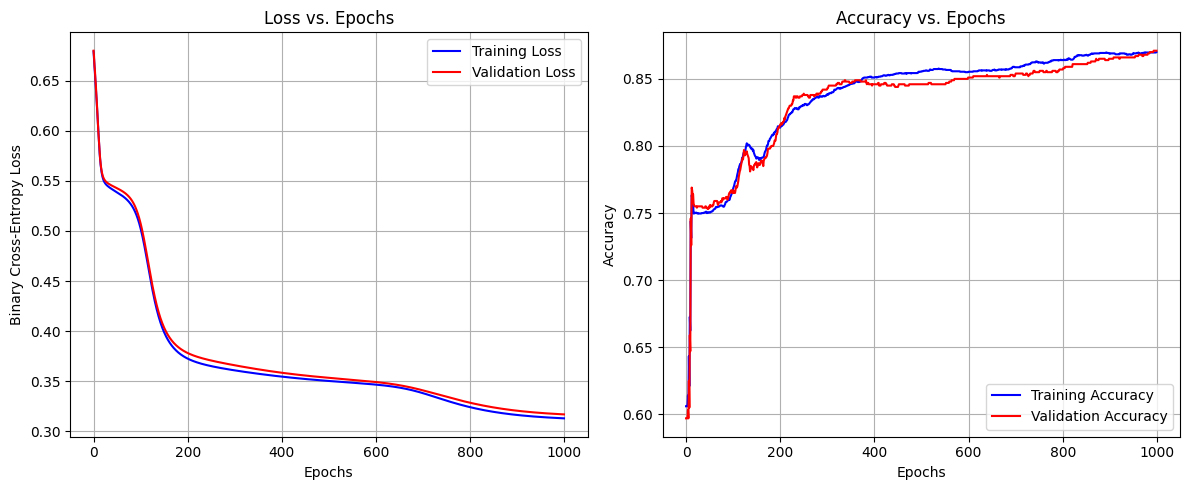

In [115]:
# f) Call the function with your best model
plot_best_model_metrics(best_model)

**f)**: 
**Loss vs Epochs**: The curve show sharp improvement form the begining until ca. 200 epochs, and then a steady incline untill 1000 epochs. Validation loss track closely through the training prosess, with validation loss staying slightly higher than traning loss.

**Accuracy vs Epochs**: We can see a pattern where validation accuracy (red line) periodically crosses above and below traning accuracy (blue line). Both metrics show rapid improvement from 0.4 to 0.8 in the first 200 epochs, followed by a slow and steady gain. 

In [116]:
#g)
train_accs, val_accs = run_model_trials(best_params, best_scaled, X_train, t2_train, X_val, t2_val)

g) Running 3 trials with optimal hyper-parameters:
   Learning rate: 0.001
   Tolerance: 1e-06
   Hidden layer size: 6
   Scaling: True
g) Trial 1/3...
   Training accuracy: 0.8703
   Validation accuracy: 0.8740
g) Trial 2/3...
   Training accuracy: 0.8657
   Validation accuracy: 0.8600
g) Trial 3/3...
   Training accuracy: 0.8607
   Validation accuracy: 0.8610

g) Results over 3 trials:
   Training accuracy: 0.8656 ± 0.0039
   Validation accuracy: 0.8650 ± 0.0064


**g) Comment on the results above:** 

The minimal difference between training and validation performance, coupled wiht low standard deviations, might confirm the models robust generalization and stability.

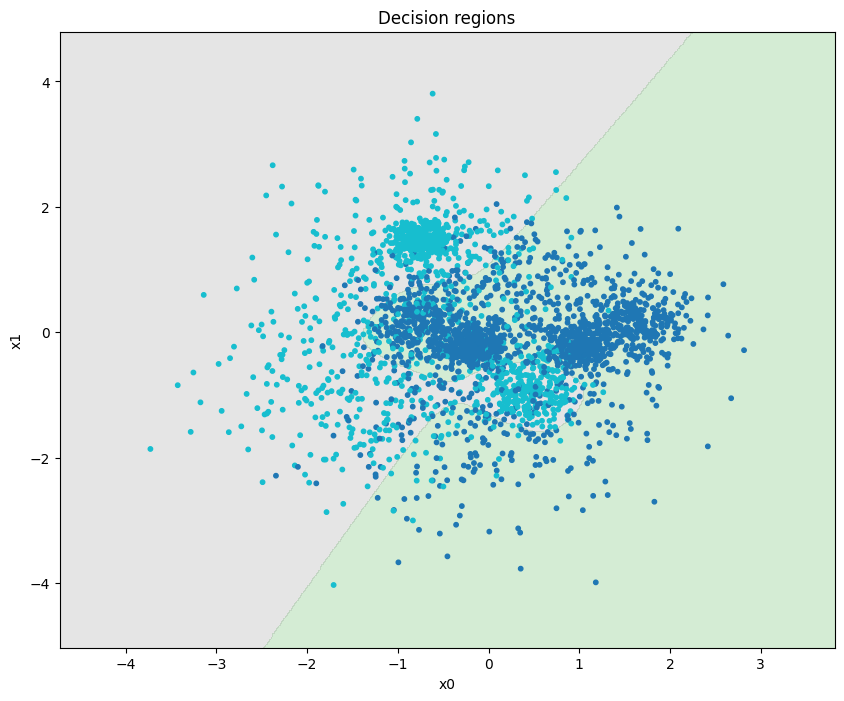

In [117]:
#Plot the decision regions using the best model
plot_decision_regions(X_train if not best_scaled else model.standardize_data(X_train)[0], t2_train, best_model, size=(10, 8))  # Create decision boundary plot

When implemented, this model can be used to make a non-linear classifier for the set `(X, t2)`. Experiment with settings for learning rate and epochs and see how good results you can get. 
Report results for various settings. Be prepared to train for a long time (but you can control it via the number of epochs and hidden size). 

Plot the training set together with the decision regions as in Part I.

# Improving the MLP classifier
You should now make changes to the classifier similarly to what you did with the logistic regression classifier in part 1.

a) In addition to the `predict()` method, which predicts a class for the data, include the `predict_probabilities()` method which predict the probability of the data belonging to the positive class. The training should be based on these values, as with logistic regression.

b) Calculate the loss and the accuracy after each epoch and store them for inspection after training.

c) Extend the `fit()` method with optional arguments for a validation set `(X_val, t_val)`. If a validation set is included in the call to `fit()`, calculate the loss and the accuracy for the validation set after each epoch.

d) Extend the `fit()` method with two keyword arguments, `tol` (tolerance) and `n_epochs_no_update` and stop training when the loss has not improved for more than `tol` after `n_epochs_no_update`. A possible default value for `n_epochs_no_update` is 2. Add an attribute to the classifier which tells us after fitting how many epochs it was trained on.

e) Tune the hyper-parameters: `lr`, `tol` and `dim-hidden` (size of the hidden layer).
Also, consider the effect of scaling the data.

f) After a succesful training with the best setting for the hyper-parameters, plot both training loss and validation loss as functions of the number of epochs in one figure, and both training and validation accuracies as functions of the number of epochs in another figure. Comment on what you see.

g) The MLP algorithm contains an element of non-determinism. Hence, train the classifier 3 times with the optimal hyper-parameters and report the mean and standard deviation of the accuracies over the 3 runs.

## For IN4050-students: Multi-class neural network

The following part is only mandatory for IN4050 students. IN3050 students are also welcome to make it a try. This is the most fun part of the set :) )

The goal is to use a feed-forward neural network for non-linear multi-class classfication and apply it to the set `(X, t_multi)`.

Modify the network to become a multi-class multinomial classifier. As a sanity check of your implementation, you may apply it to `(X, t_2)` and see whether you get similar results as above.

Train the resulting classifier on `(X_train, t_multi_train)`, test it on `(X_val, t_multi_val)`, tune the hyper-parameters and report the accuracy.

Plot the decision boundaries for your best classifier. Evaluate the  best model predictions for each class separately (same as in part 1)  and report your findings. Please also report whether there is any difference in this respect between the training and the validation sets.

# Part III: Final testing
We can now perform a final testing on the held-out test set we created in the beginning.

## Binary task (X, t2)
Consider the linear regression classifier, the logistic regression classifier and the multi-layer network with the best settings you found. Train each of them on the training set and evaluate on the held-out test set, but also on the validation set and the training set. Report the performance in a 3 by 3 table.

Comment on what you see. How do the three different algorithms compare? Also, compare the results between the different dataset splits. In cases like these, one might expect slightly inferior results on the held-out test data compared to the validation and training data. Is this the case? 

Also report precision and recall for class 1.

Setting up models...
Evaluating models...

Accuracy Table:
                     Model  Train Accuracy  Val Accuracy  Test Accuracy
  Linear Regression (Best)          0.7723        0.7620         0.7530
Logistic Regression (Best)          0.7497        0.7560         0.7530
                MLP (Best)          0.8660        0.8620         0.8550

Precision and Recall for Class 1:
                     Model  Train Precision  Val Precision  Test Precision  Train Recall  Val Recall  Test Recall
  Linear Regression (Best)           0.9400         0.9275          0.9421        0.4509      0.4442       0.4313
Logistic Regression (Best)           0.6972         0.7202          0.7373        0.6447      0.6452       0.6289
                MLP (Best)           0.8374         0.8406          0.8479        0.8190      0.8114       0.7928


<Figure size 1000x800 with 0 Axes>

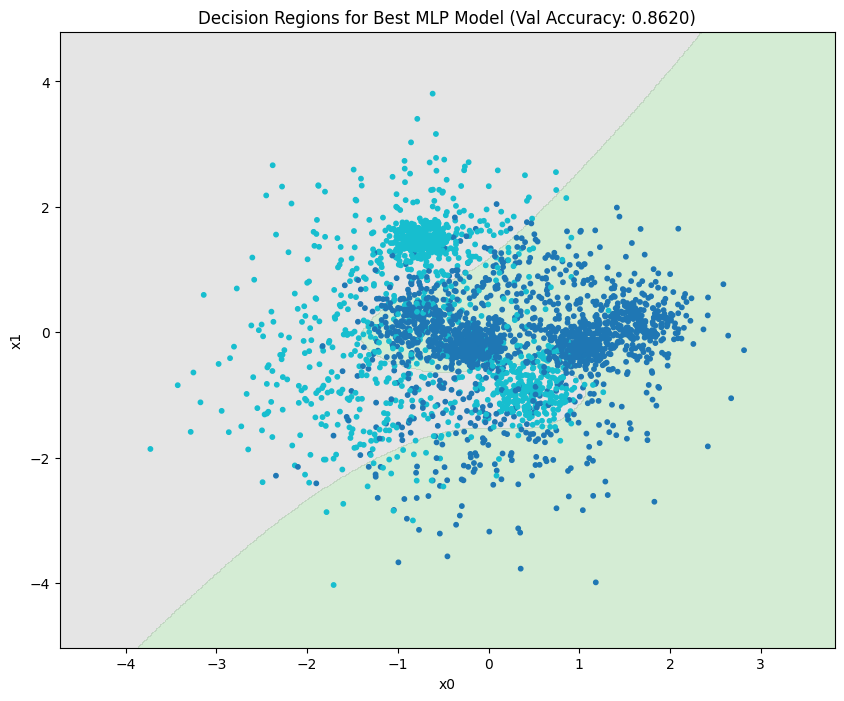

In [131]:
# Part III: Final testing for Binary task (X, t2)
import pandas as pd 

# Function to calculate metrics manually
def calculate_metrics(y_true, y_pred):
    """Calculate accuracy, precision and recall for binary classification"""
    accuracy = np.mean(y_pred == y_true) # Calculate accuracy
    
    # Precision = TP / (TP + FP)
    predicted_positives = (y_pred == 1) 
    precision = np.sum((y_pred == 1) & (y_true == 1)) / np.sum(predicted_positives) if np.sum(predicted_positives) > 0 else 0.0
    
    # Recall = TP / (TP + FN)
    actual_positives = (y_true == 1)
    recall = np.sum((y_pred == 1) & (y_true == 1)) / np.sum(actual_positives) if np.sum(actual_positives) > 0 else 0.0
        
    return accuracy, precision, recall

# Setup models
print("Setting up models...")
# MLP model with best parameters
best_mlp = MLPBinaryLinRegClass(dim_hidden=best_params['dim_hidden']) # Create MLP model with best parameters

# Standardize data for all models. 
X_train_scaled, X_val_scaled, X_test_scaled = best_mlp.standardize_data(X_train, X_val, X_test) # Scale data
X_train_mlp, X_val_mlp, X_test_mlp = X_train_scaled, X_val_scaled, X_test_scaled # Assign scaled data to variables

# Train MLP model
best_mlp.fit(X_train_mlp, t2_train, lr=best_params['lr'], epochs=1000, 
            X_val=X_val_mlp, t_val=t2_val, tol=best_params['tol'], n_epochs_no_update=5)

# Linear regression model with best parameters
lin_reg = NumpyLinRegClass() # Initialize linear regression model
lin_reg.fit(X_train, t2_train, lr=0.01, epochs=200) # Train with best parameters: lr=0.01, epochs=200

# Logistic regression model with best parameters
log_reg = NumpyLogReg() # Initialize logistic regression model
log_reg.fit(X_train_scaled, t2_train, eta=1.438449888287663, epochs=1000, tol=1e-06) # Train with best parameters. 

# Define models, inputs, and labels for easy iteration
models = [
    {"name": "Linear Regression (Best)", "model": lin_reg, "X_train": X_train, "X_val": X_val, "X_test": X_test},
    {"name": "Logistic Regression (Best)", "model": log_reg, "X_train": X_train_scaled, "X_val": X_val_scaled, "X_test": X_test_scaled},
    {"name": "MLP (Best)", "model": best_mlp, "X_train": X_train_mlp, "X_val": X_val_mlp, "X_test": X_test_mlp}
]

# Create empty DataFrame for results
all_results = []

# Evaluate all models
print("Evaluating models...")
for model_info in models: # Loops through each model configuration
    model_name = model_info["name"] # Get model name
    model = model_info["model"] # Get model instance
    
    # Get predictions for all datasets
    train_pred = model.predict(model_info["X_train"]) # Makes predictions on training data
    val_pred = model.predict(model_info["X_val"]) # Makes predictions on validation data
    test_pred = model.predict(model_info["X_test"]) # Makes predictions on test data
    
    # Calculate metrics
    train_acc, train_prec, train_rec = calculate_metrics(t2_train, train_pred) # Evaluates training performance
    val_acc, val_prec, val_rec = calculate_metrics(t2_val, val_pred) # Evaluates validation performance
    test_acc, test_prec, test_rec = calculate_metrics(t2_test, test_pred) # Evaluates test performance 
    
    # Add to results list and store all metrics in a dictionary 
    all_results.append({
        "Model": model_name,
        "Train Accuracy": train_acc,
        "Val Accuracy": val_acc,
        "Test Accuracy": test_acc,
        "Train Precision": train_prec,
        "Val Precision": val_prec,
        "Test Precision": test_prec,
        "Train Recall": train_rec,
        "Val Recall": val_rec,
        "Test Recall": test_rec
    })

# Convert results to DataFrame
results_df = pd.DataFrame(all_results)

# Create and display accuracy table
print("\nAccuracy Table:")
accuracy_table = results_df[['Model', 'Train Accuracy', 'Val Accuracy', 'Test Accuracy']] # Select accuracy columns
print(accuracy_table.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

# Create and display precision and recall table
print("\nPrecision and Recall for Class 1:")
pr_table = results_df[['Model', 'Train Precision', 'Val Precision', 'Test Precision', 
                     'Train Recall', 'Val Recall', 'Test Recall']]
print(pr_table.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

# Plot decision regions for the best MLP model
plt.figure(figsize=(10, 8))
plot_decision_regions(X_train_mlp, t2_train, best_mlp, size=(10, 8))
plt.title(f"Decision Regions for Best MLP Model (Val Accuracy: {results_df.loc[2, 'Val Accuracy']:.4f})")
plt.show()

**Comment on the results above**:

**Model Comparison (Accuracy)**
With all models using their optimal hyperparameters, the results show differences:
- MLP (Best) is the top performer with test accuracy of 0.8550,  outperforming both other models. 
- Linear Regression (Best) and Logistic Regression (Best) tie at 0.7530 test accuracy. 

**Precision and Recall Tradeoffs**
Despite identical test accuracies, Linear and Logistic Regression show  different classification strategies:
- Linear Regression demonstrates high precision (0.9421) but not so good recall (0.4313), indicating it rarely makes positive predictions, but when it does, it's almost always correct.
- Logistic Regression has more balanced but moderate precision (0.7373) and recall (0.6289), showing a more even approach to classification.
- MLP achieves the best of for both with high precision (0.8479) and high recall (0.7928). 

**Dataset Split Comparison**
Regarding the expected pattern of decreasing performance across splits:
- Linear Regression and MLP both follow the expected pattern: Train > Validation > Test accuracies. 
- Logistic Regression shows a slight inversion with Validation (0.7560) > Training (0.7497) > Test (0.7530). This might suggests Logistic Regression benefits slightly from the validation data distribution or might have some regularization effect during training. 

## For IN4050-students: Multi-class task (X, t_multi)

The following part is only mandatory for IN4050-students. IN3050-students are also welcome to give it a try though.

Compare the three multi-class classifiers: the standard multi-class and the multinomial logistic regression from part one and the multi-class neural network from part two. Evaluate on test, validation and training set as above.

Comment on the results.